#Relatório de Pré-Processamento de Dados
##[Introdução a aprendizado de máquina]

<ul><li>Abid Lohan - DRE: 117099118</li>
<li>Nicolly Zorzam - DRE: 121037550</li>
<li>Vitória Nazareth - DRE: 121076766</li></ul>

**Base de dados original:** https://www.kaggle.com/datasets/lainguyn123/student-performance-factors

<p align='justify'><b>Introdução:</b> a base escolhida contém diversas informações que podem influenciar a performance de um estudante durante as avaliações. Os dados incluem hábitos de estudos, percentual de presença, envolvimento dos pais, notas de exames e outros aspectos.

Embora diversos parâmetros tenham sido mapeados, identificamos a ausência de informações essenciais que não foram fornecidas pelo proprietário da base. Faltam detalhes como o local de coleta dos dados (país/região), a faixa etária e o nível de escolaridade dos estudantes (se estão no ensino fundamental ou médio). Além disso, alguns atributos carecem de descrições mais claras. Por exemplo, não está especificado se o campo "Previous_Scores" se refere à última avaliação feita pelo estudante antes do exame final ou à média de todos os exames realizados ao longo de um período não delimitado. Outros atributos também são excessivamente subjetivos por serem categóricos, como o "Motivation_Level" do estudante.

Apesar das limitações mencionadas, o grupo decidiu utilizar essa base de dados por se tratar de um tema de grande interesse (performance acadêmica). Além disso, acreditamos que, mesmo com os problemas relatados, é possível realizar análises relevantes e aplicar modelos de previsão e clusterização de maneira satisfatória. Em outras palavras, as questões apontadas não comprometeriam significativamente os nossos resultados.</p>

**Variáveis:**
<ol>
<li>Hours_Studied: horas de estudo por semana</li>
<li>Attendance: porcentagem de presença nas aulas</li>
<li>Parental_Involvement: nível de envolvimento dos pais (Low, Medium, High)</li>
<li>Access_to_Resources: disponibilidade de recursos educacionais (Low, Medium, High)</li>
<li>Extracurricular_Activities: participação em atividades extracurriculares (Yes, No)</li>
<li>Sleep_Hours: número médio de horas de sono por noite</li>
<li>Previous_Scores: notas de exames anteriores</li>
<li>Motivation_Level:	nível de motivação do estudante (Low, Medium, High)</li>
<li>Internet_Access: acesso à internet (Yes, No)</li>
<li>Tutoring_Sessions: número de monitorias frequentadas por mês</li>
<li>Family_Income: renda da família (Low, Medium, High)</li>
<li>Teacher_Quality: qualidade dos professores (Low, Medium, High)</li>
<li>School_Type: tipo de escola (Public, Private).</li>
<li>Peer_Influence: influência dos colegas na performance acadêmica (Positive, Neutral, Negative)</li>
<li>Physical_Activity: média de horas de atividades físicas por semana</li>
<li>Learning_Disabilities: presença de deficiência que prejudica o aprendizado (Yes, No)</li>
<li>Parental_Education_Level:	maior grau de escolaridade dos pais (High School, College, Postgraduate)</li>
<li>Distance_from_Home:	distância de casa para a escola (Near, Moderate, Far)</li>
<li>Gender:	gênero do estudante (Male, Female)</li>
<li>Exam_Score:	nota no exame final</li></ol>























##Objetivo
<p align='justify'>O objetivo inicial do grupo é utilizar a base de dados para medir, classificar e prever aspectos relacionados à performance acadêmica. As primeiras análises que pretendemos realizar incluem:</p>

<ul><li>Avaliar o desempenho geral dos estudantes;</li>
<li>Analisar o desempenho por categorias, como gênero, renda e tipo de escola;</li>
<li>Examinar a relação entre hábitos de estudo (horas dedicadas, frequência às aulas e monitorias) e a performance acadêmica;</li>
<li>Explorar a influência de hábitos saudáveis (horas de sono e prática de atividades físicas) na performance acadêmica.</li></ul>

<p align='justify'>Além disso, planejamos realizar análises com o uso de algoritmos preditivos e classificatórios, como:</p>

<ul>
<li>Agrupamento de estudantes, buscando identificar perfis por meio de clusterização;</li>
<li>Previsão das notas finais dos estudantes.</li></ul>


In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
# Carregando a base de dados
# Lembre de carregar o .csv no Colab
df = pd.read_csv('/content/StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
df.count()

,0
Hours_Studied,6607
Attendance,6607
Parental_Involvement,6607
Access_to_Resources,6607
Extracurricular_Activities,6607
Sleep_Hours,6607
Previous_Scores,6607
Motivation_Level,6607
Internet_Access,6607
Tutoring_Sessions,6607


###Primeiro Passo: Limpeza de dados

<p align='justify'>Nesta etapa, vamos procurar por dados ausentes, identificar e tratar os outliers e também possíveis inconsistências.</p>

In [ ]:
# Conta a quantidade de NAs por atributo
ausentes = df.isna().sum()
ausentes

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


<p align='justify'>Acima temos as colunas com dados ausentes e quantos são para cada uma. Podemos substitui-los pela média, moda ou mediana, mas também simplesmente removê-los.

As colunas com dados ausentes, entretanto, são todas categóricas e não numéricas. Uma possibilidade é <b>'dropar'</b> todas as linhas que tenham algum dado ausente. Considerando o tamanho da nossa base, acreditamos que não estaríamos prejudicando nossas análises posteriores.

No fim, optamos por <b>substituir pela moda</b>, onde identificamos, para cada coluna, qual categoria mais aparece e preenchemos as linhas ausentes com essa categoria.</p>

In [ ]:
print(df['Teacher_Quality'].value_counts(),"\n") #a moda é 'Medium'
print(df['Parental_Education_Level'].value_counts(),"\n") #a moda é 'High School'
print(df['Distance_from_Home'].value_counts(), "\n") #a moda é 'Near'

Teacher_Quality
Medium    3925
High      1947
Low        657
Name: count, dtype: int64 

Parental_Education_Level
High School     3223
College         1989
Postgraduate    1305
Name: count, dtype: int64 

Distance_from_Home
Near        3884
Moderate    1998
Far          658
Name: count, dtype: int64 



In [ ]:
# Substituir pela moda
df['Teacher_Quality'] = df['Teacher_Quality'].fillna('Medium')
df['Parental_Education_Level'] = df['Parental_Education_Level'].fillna('High School')
df['Distance_from_Home'] = df['Distance_from_Home'].fillna('Near')

In [ ]:
# Checando os dados ausentes
ausentes = df.isna().sum()
ausentes

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0




<p align='justify'>Com os dados ausentes resolvidos, vamos identificar os outliers e tratá-los. Vamos procurar por outliers nas colunas numéricas, desconsiderando aquelas que representam níveis ("Medium, Low, High"). Ou seja, vamos analisar as colunas das pontuações dos exames, das horas estudadas, da presença, das horas dormidas e também das visitas as monitorias.</p>

<p align='justify'>Outliers são valores discrepantes que se diferenciam muito do restante da amostra. Considerando o contexto do nosso banco de dados, precisamos decidir primeiro o que é "normal" para cada variável analisada, por exemplo: não seria anormal um aluno tirar 0 em determinado exame, porém valores negatios seriam estranhos. Isso pode significar um erro na hora de popular o banco e esses valores devem ser tratados/removidos, pois podem atrapalhar modelos na hora de aprender o padrão dos dados.</p>


<Axes: >

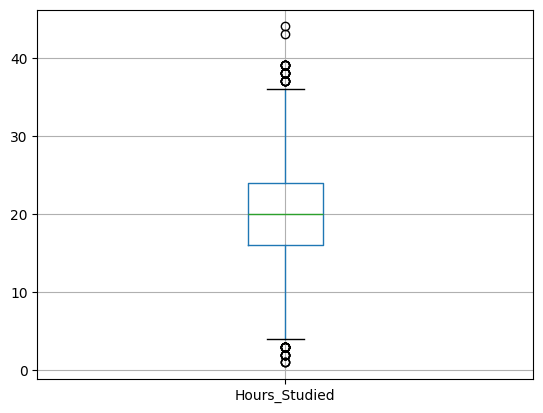

In [ ]:
# Analisando os outliers das horas estudadas
df.boxplot(column='Hours_Studied')

<p align='justify'>Com o boxplot podemos identificar que existem outliers. Nesse caso são estudantes que estudam bem mais e bem menos que a maioria. A questão agora é tentar entender se esse fato é ou não "normal". Intuitivamente, não há nada de errado em ter alunos estudando mais ou menos do que a maioria, poderíamos apenas compreender esses alunos como mais ou menos esforçados, contudo, vamos fazer uma análise mais profunda desses outliers. Na célula abaixo, o grupo realizou alguns cálculos para nos ajudar a entender melhor a nossa observação.  </p>

In [ ]:
#calculando os quartis
Q1df = df['Hours_Studied'].quantile(.25)
Q2df = df['Hours_Studied'].quantile(.5)
Q3df = df['Hours_Studied'].quantile(.75)

IQR = Q3df - Q1df

#limite inferior
lim_inf = Q1df - (1.5*IQR)

#limite superior
lim_sup = Q3df + (1.5*IQR)

estudiosos = (df['Hours_Studied'] > lim_sup).sum()
n_estudiosos = (df['Hours_Studied'] < lim_inf).sum()

print("1º, 2º e 3º Quartis:", Q1df, Q2df, Q3df)
print("IQR:", IQR)
print("Nmr de outliers acima dos limites: ", estudiosos)
print("Nmr de outliers abaixo dos limites: ", n_estudiosos)
print("Limite superior:", lim_sup)
print("Limite inferior:", lim_inf)


1º, 2º e 3º Quartis: 16.0 20.0 24.0
IQR: 8.0
Nmr de outliers acima dos limites:  22
Nmr de outliers abaixo dos limites:  21
Limite superior: 36.0
Limite inferior: 4.0


<p align='justify'>Considerando que estamos falando de uma média de horas de estudo por semana, os valores acima parecem dentro da realidade. Pegando a primeira linha da tabela abaixo como exemplo: alguém que estuda em média 44h/semana, estuda em média 6h por dia. Considerando que um dia tem 24h, é possível que algum aluno se dedique essa quantidade de horas.

Logo, essa situação não parece ser impossível, então os valores não necessariamente estão errados ou não condizem com uma possível realidade. Isso quer dizer que nenhum dos alunos estudiosos está dormindo e estudando ao mesmo tempo, o que representaria uma incositência.</p>

In [ ]:
df['Hours_Studied'].max()

44

<p align='justify'>Outra análise que fizemos foi calcular a média, variância e o desvio padrão com e sem os outliers para verificar se haveria alguma diferença significativa. Apesar dos cálculos apresentarem uma diferença, não consideramos grande o suficiente para afetar qualquer resultado. Dessa forma, optamos por manter os outliers visto que eles não fogem da realidade dos dados. Outro ponto que também consideramos foi em aceitar uma alta variância nos dados, pois acreditamos que seria interessante para pegar uma grande variedade de hábitos distintos dos estudantes tanto para poder segmentar mais tarde quanto para associar esses hábitos com uma melhor ou pior performance.</p>

In [ ]:
#valores com os outliers
mediaEstudo = df['Hours_Studied'].mean()
varianciaEstudo = df['Hours_Studied'].var()
desvioEstudo = df['Hours_Studied'].std()

print("Com outliers")
print("Média: ", mediaEstudo)
print("Variância: ", varianciaEstudo)
print("Desvio padrão ", desvioEstudo)

print()
#Valores sem os outliers
df_hs = df[(df['Hours_Studied'] < lim_sup) & (df['Hours_Studied'] > lim_inf)]

mediaEstudo_hs = df_hs['Hours_Studied'].mean()
varianciaEstudo_hs = df_hs['Hours_Studied'].var()
desvioEstudo_hs = df_hs['Hours_Studied'].std()

print("Sem outliers")
print("Média: ", mediaEstudo_hs)
print("Variância: ", varianciaEstudo_hs)
print("Desvio padrão ", desvioEstudo_hs)

Com outliers
Média:  19.975329196306948
Variância:  35.887220505449555
Desvio padrão  5.990594336578764

Sem outliers
Média:  19.983782129742963
Variância:  33.018558669587435
Desvio padrão  5.746177744343402


<p align='justify'>Prosseguimos então para o boxplot das outras variáveis, tratando e analisando somente aquelas que apresentam outliers.</p>

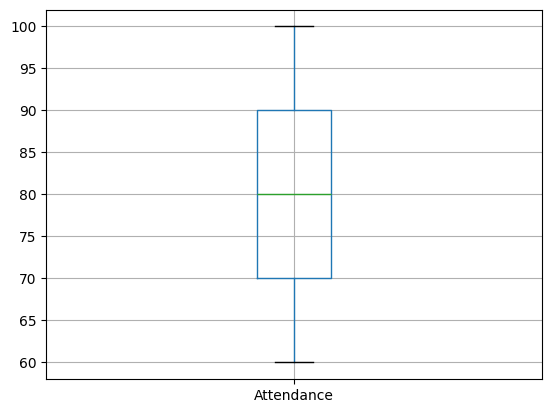

In [ ]:
#variável de presença nas aulas
df.boxplot(column='Attendance')

mediaPresenca = df['Attendance'].mean()
varianciaPresenca = df['Attendance'].var()
desvioPresenca = df['Attendance'].std()

#print(mediaPresenca)
#print(varianciaPresenca)
#print(desvioPresenca)

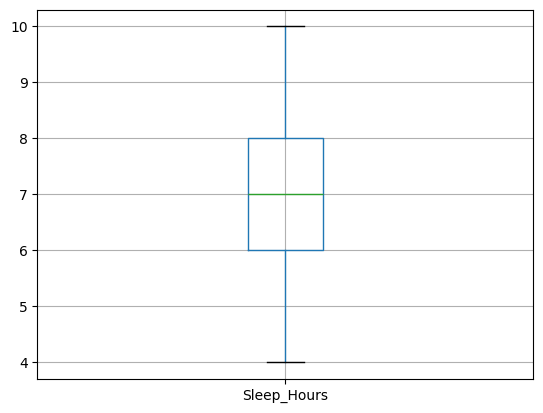

In [ ]:
#Analise das horas de sono por dia
df.boxplot(column='Sleep_Hours')

mediaSono = df['Sleep_Hours'].mean()
varianciaSono = df['Sleep_Hours'].var()
desvioSono = df['Sleep_Hours'].std()

#print(mediaSono)
##print(varianciaSono)
#print(desvioSono)

#print("Horas minimas dormidas: ", df_hs['Sleep_Hours'].min())
#print("Horas maximas dormidas: ", df_hs['Sleep_Hours'].max())

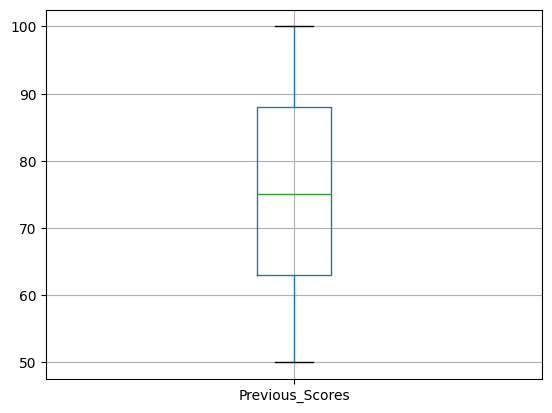

In [ ]:
#Analise de exames anteriores
df.boxplot(column='Previous_Scores')

mediaPrevious = df['Previous_Scores'].mean()
varianciaPrevious = df['Previous_Scores'].var()
desvioPrevious = df['Previous_Scores'].std()

#print(mediaPrevious)
#print(varianciaPrevious)
#print(desvioPrevious)

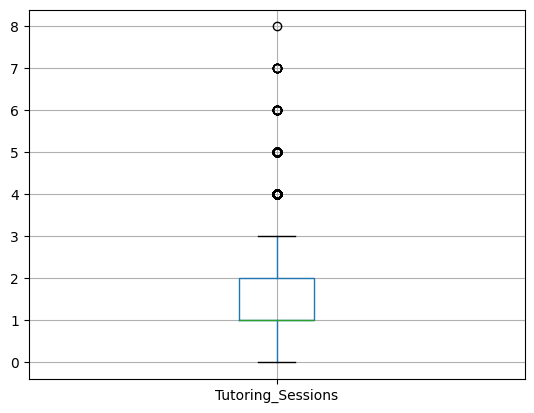

In [ ]:
#analise da média de monitorias frequentadas por mês
df.boxplot(column='Tutoring_Sessions')

#aumentar a variância?
mediaMonitoria = df['Tutoring_Sessions'].mean()
varianciaMonitoria = df['Tutoring_Sessions'].var()
desvioMonitoria = df['Tutoring_Sessions'].std()

#print(mediaMonitoria)
#print(varianciaMonitoria)
#print(desvioMonitoria)

<p align='justify'>Como temos outliers aqui também, vamos realizar mais cálculos assim como fizemos anteriormente.<p>

In [ ]:
Q1df = df['Tutoring_Sessions'].quantile(.25)
Q2df = df['Tutoring_Sessions'].quantile(.5)
Q3df = df['Tutoring_Sessions'].quantile(.75)

IQR = Q3df - Q1df

#limite inferior
lim_inf = Q1df - (1.5*IQR)

#limite superior
lim_sup = Q3df + (1.5*IQR)

esforçados = (df['Tutoring_Sessions'] > lim_sup).sum()
n_esforçados = (df['Tutoring_Sessions'] < lim_inf).sum()

print("1º, 2º e 3º Quartis:", Q1df, Q2df, Q3df)
print("IQR:", IQR)
print("Nmr de outliers acima dos limites: ", esforçados)
print("Nmr de outliers abaixo dos limites: ", n_esforçados)
print("Limite superior:", lim_sup)
print("Limite inferior:", lim_inf)

1º, 2º e 3º Quartis: 1.0 1.0 2.0
IQR: 1.0
Nmr de outliers acima dos limites:  430
Nmr de outliers abaixo dos limites:  0
Limite superior: 3.5
Limite inferior: -0.5


In [ ]:
df["Tutoring_Sessions"].unique()

array([0, 2, 1, 3, 4, 5, 6, 7, 8])

<p align='justify'>Como, mais uma vez, não encontramos nada fora da realidade, apenas alunos que vão mais a monitoria, também não acreditamos ser necessária a remoção desses dados.</p>

<Axes: >

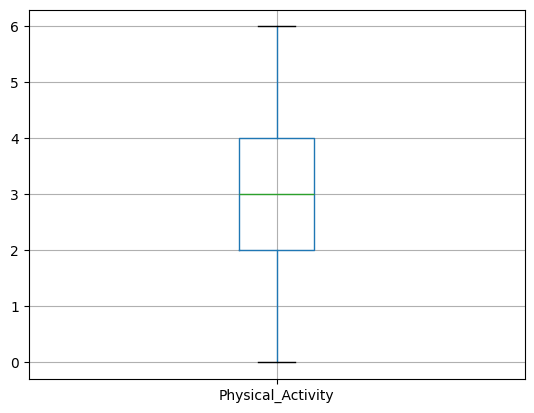

In [ ]:
# Análise das horas de atividade física por semana
df.boxplot(column='Physical_Activity')

<p align='justify'>Em relação as notas do exame final, encontramos outliers acima do valor máximo da prova.</p>

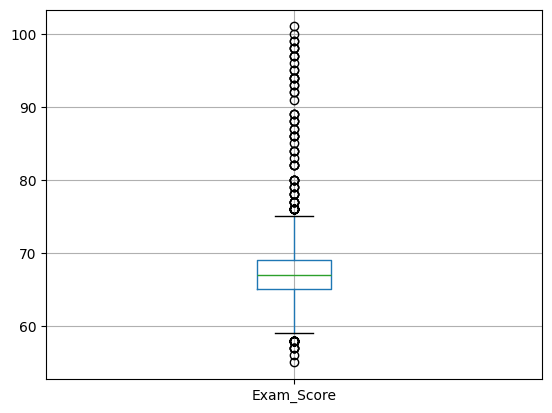

In [ ]:
df.boxplot(column='Exam_Score')

mediaExame = df['Exam_Score'].mean()
varianciaExame = df['Exam_Score'].var()
desvioExame = df['Exam_Score'].std()

#print(mediaExame)
#print(varianciaExame)
#print(desvioExame)

In [ ]:
#Estudantes com notas maiores que 100
suspeitos = (df['Exam_Score'] > 100).sum()
suspeitos

1

In [ ]:
aluno_suspeito = df.query('Exam_Score > 100')
aluno_suspeito

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
1525,27,98,Low,Medium,Yes,6,93,Low,No,5,High,High,Public,Positive,3,No,High School,Moderate,Female,101


<p align='justify'>Por não ser uma diferença muito grande e, também por se tratar de apenas um estudante, o erro pode ter sido causado por erro de digitação. Na célula abaixo consertamos a nota desse estudante.</p>

In [ ]:
#Alterando o valor para 100
df.loc[1525	, 'Exam_Score'] = 100

<p align='justify'>Apesar de termos muitos outliers, nenhum deles parece fugir do que é normal. São alunos que estão acima da média e alunos que estão abaixo. Tirando o estudante que ficou acima da nota máxima, nenhum outro pareceu ser um caso errôneo e, por isso, nenhum outliers identificado foi removido.</p>

In [ ]:
print("Nota mínima: ", df["Exam_Score"].min())
print("Nota máxima: ", df["Exam_Score"].max())

Nota mínima:  55
Nota máxima:  100


<p align='justify'>Uma última tarefa nessa primeira etapa foi a remoção de duplicatas</p>

In [ ]:
df.drop_duplicates()
df_hs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6536 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6536 non-null   int64 
 1   Attendance                  6536 non-null   int64 
 2   Parental_Involvement        6536 non-null   object
 3   Access_to_Resources         6536 non-null   object
 4   Extracurricular_Activities  6536 non-null   object
 5   Sleep_Hours                 6536 non-null   int64 
 6   Previous_Scores             6536 non-null   int64 
 7   Motivation_Level            6536 non-null   object
 8   Internet_Access             6536 non-null   object
 9   Tutoring_Sessions           6536 non-null   int64 
 10  Family_Income               6536 non-null   object
 11  Teacher_Quality             6536 non-null   object
 12  School_Type                 6536 non-null   object
 13  Peer_Influence              6536 non-null   object
 1

###Segundo Passo: Integração de dados
<p align='justify'>Como nossos dados são provenientes de uma única fonte, não foi necessária qualquer integração e, por isso, passamos para a terceira etapa.</p>




###Terceiro Passo: Redução de dados
<p align='justify'>Agora vamos alterar o tipo dos dados representados na tabela. Existem dados que podem ser do tipo 'bool' (Yes/No) e dados categóricos (Medium, Low, High). Dados categóricos são textos e, para os algoritmos que queremos utilizar, não serão bem tratados. Com isso, vamos mudar os tipos dos dados para 'int' com um mapeamento manual. Outra alteração que faremos nesse passo é a redução da matriz removendo as colunas "Teacher_Quality" e "Motivation_Level". O grupo escolheu remover essas colunas, pois accreditamos que são muito subjetivas e dificeis de quantificar. Além disso, não acreditamos que seriam necessárias para as análises que serão feitas posteriormente (apresentadas no Objetivo). </p>

In [ ]:
# Dropando as colunas que não são necessárias para a análise
df = df.drop(['Teacher_Quality', 'Motivation_Level'],  axis=1)

In [ ]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Internet_Access,Tutoring_Sessions,Family_Income,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Yes,0,Low,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Yes,2,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Yes,2,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Yes,1,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Yes,3,Medium,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
#Exibindo os tipos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Internet_Access             6607 non-null   object
 8   Tutoring_Sessions           6607 non-null   int64 
 9   Family_Income               6607 non-null   object
 10  School_Type                 6607 non-null   object
 11  Peer_Influence              6607 non-null   object
 12  Physical_Activity           6607 non-null   int64 
 13  Learning_Disabilities       6607 non-null   obje

<p align='justify'>Para poder trabalhar melhor vamos converter os tipos de algumas colunas presentes no banco de dados.

Com a célula acima podemos ver que a maioria das colunas são do tipo 'object', pois apresentam strings em seus valores e receberam esse tipo por padrão. Como não temos dados de texto e nem dados mistos (números e strings) o tipo 'object' pode ser substituído pelos tipos 'int', 'bool' e 'category' a fim de melhorar a eficiência de armazenamento e processamento. Contudo, como já explicado anteriormente, vamos alterar os tipos para 'int'.</p>

<p align='justify'>As colunas 'Extracurricular_Activities', 'Internet_Access' e 'Learning_Disabilities' que tem valores 'Yes' ou 'No' vão ser convertidas para 0 ou 1.

As colunas que possuem valores com uma relação de ordem entre si ('Medium, Low, High', 'Near, Moderate, Far' e 'High School, College, Postgraduate') vão receber valores de 1 a 3.

A coluna "Peer_Influence" com valores 'Positive, Neutral, Negative' vai receber 1, 0 e -1, respectivamente.

Já para as colunas de Gender e School_Type que não possuem essa relação, vamos usar o método get_dummies.</p>

In [ ]:
#Colunas yes/no para 0 e 1
df['Extracurricular_Activities'] = df['Extracurricular_Activities'].map({'Yes': 1, 'No': 0}).astype(int)
df['Internet_Access'] = df['Internet_Access'].map({'Yes': 1, 'No': 0}).astype(int)
df['Learning_Disabilities'] = df['Learning_Disabilities'].map({'Yes': 1, 'No': 0}).astype(int)
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Internet_Access,Tutoring_Sessions,Family_Income,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,0,7,73,1,0,Low,Public,Positive,3,0,High School,Near,Male,67
1,19,64,Low,Medium,0,8,59,1,2,Medium,Public,Negative,4,0,College,Moderate,Female,61
2,24,98,Medium,Medium,1,7,91,1,2,Medium,Public,Neutral,4,0,Postgraduate,Near,Male,74
3,29,89,Low,Medium,1,8,98,1,1,Medium,Public,Negative,4,0,High School,Moderate,Male,71
4,19,92,Medium,Medium,1,6,65,1,3,Medium,Public,Neutral,4,0,College,Near,Female,70


In [ ]:
#Colunas com relação de ordem para 1, 2 e 3
df['Parental_Involvement'] = df['Parental_Involvement'].map({'Low': 1, 'Medium': 2, 'High':3}).astype(int)
df['Access_to_Resources'] = df['Access_to_Resources'].map({'Low': 1, 'Medium': 2, 'High':3}).astype(int)
df['Family_Income'] = df['Family_Income'].map({'Low': 1, 'Medium': 2, 'High':3}).astype(int)
df['Parental_Education_Level'] = df['Parental_Education_Level'].map({'High School': 1, 'College': 2, 'Postgraduate':3}).astype(int)
df['Distance_from_Home'] = df['Distance_from_Home'].map({'Near': 1, 'Moderate': 2, 'Far':3}).astype(int)

# Peer Influence para 1, 0 e -1
df['Peer_Influence'] = df['Peer_Influence'].map({'Positive': 1, 'Neutral': 0, 'Negative':-1}).astype(int)

df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Internet_Access,Tutoring_Sessions,Family_Income,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,3,0,7,73,1,0,1,Public,1,3,0,1,1,Male,67
1,19,64,1,2,0,8,59,1,2,2,Public,-1,4,0,2,2,Female,61
2,24,98,2,2,1,7,91,1,2,2,Public,0,4,0,3,1,Male,74
3,29,89,1,2,1,8,98,1,1,2,Public,-1,4,0,1,2,Male,71
4,19,92,2,2,1,6,65,1,3,2,Public,0,4,0,2,1,Female,70


In [ ]:
#Colunas com get_dummies
df_encoded = pd.get_dummies(df, columns=['School_Type', 'Gender'])
df_encoded.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Internet_Access,Tutoring_Sessions,Family_Income,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Exam_Score,School_Type_Private,School_Type_Public,Gender_Female,Gender_Male
0,23,84,1,3,0,7,73,1,0,1,1,3,0,1,1,67,False,True,False,True
1,19,64,1,2,0,8,59,1,2,2,-1,4,0,2,2,61,False,True,True,False
2,24,98,2,2,1,7,91,1,2,2,0,4,0,3,1,74,False,True,False,True
3,29,89,1,2,1,8,98,1,1,2,-1,4,0,1,2,71,False,True,False,True
4,19,92,2,2,1,6,65,1,3,2,0,4,0,2,1,70,False,True,True,False


<p align='justify'>Como os valores acima passaram para True e False, na célula abaixo fizemos o mapeamento manual para 0 e 1 no tipo 'int'.</p>

In [ ]:
df_encoded['School_Type_Private'] = df_encoded['School_Type_Private'].map({True: 1, False: 0}).astype(int)
df_encoded['School_Type_Public'] = df_encoded['School_Type_Public'].map({True: 1, False: 0}).astype(int)
df_encoded['Gender_Female'] = df_encoded['Gender_Female'].map({True: 1, False: 0}).astype(int)
df_encoded['Gender_Male'] = df_encoded['Gender_Male'].map({True: 1, False: 0}).astype(int)

In [ ]:
df_encoded.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Internet_Access,Tutoring_Sessions,Family_Income,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Exam_Score,School_Type_Private,School_Type_Public,Gender_Female,Gender_Male
0,23,84,1,3,0,7,73,1,0,1,1,3,0,1,1,67,0,1,0,1
1,19,64,1,2,0,8,59,1,2,2,-1,4,0,2,2,61,0,1,1,0
2,24,98,2,2,1,7,91,1,2,2,0,4,0,3,1,74,0,1,0,1
3,29,89,1,2,1,8,98,1,1,2,-1,4,0,1,2,71,0,1,0,1
4,19,92,2,2,1,6,65,1,3,2,0,4,0,2,1,70,0,1,1,0


In [ ]:
# Verificando os tipos após conversões
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Hours_Studied               6607 non-null   int64
 1   Attendance                  6607 non-null   int64
 2   Parental_Involvement        6607 non-null   int64
 3   Access_to_Resources         6607 non-null   int64
 4   Extracurricular_Activities  6607 non-null   int64
 5   Sleep_Hours                 6607 non-null   int64
 6   Previous_Scores             6607 non-null   int64
 7   Internet_Access             6607 non-null   int64
 8   Tutoring_Sessions           6607 non-null   int64
 9   Family_Income               6607 non-null   int64
 10  Peer_Influence              6607 non-null   int64
 11  Physical_Activity           6607 non-null   int64
 12  Learning_Disabilities       6607 non-null   int64
 13  Parental_Education_Level    6607 non-null   int64
 14  Distance

In [ ]:
# Salvando a base preprocessada
df_encoded.to_csv('Performance_preprocessada.csv', index=False)

###Quarto Passo: Transformação de Dados

<p align='justify'>Na última etapa, vamos normalizar e padronizar os dados com o método MinMaxScaler e com StandardScaler. </p>

In [ ]:
# Normalizando
scaler = MinMaxScaler()

df_norm = scaler.fit_transform(df_encoded)
df_norm = pd.DataFrame(df_norm, columns=df_encoded.columns)

In [ ]:
df_norm.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Internet_Access,Tutoring_Sessions,Family_Income,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Exam_Score,School_Type_Private,School_Type_Public,Gender_Female,Gender_Male
0,0.511628,0.600,0.0,1.0,0.0,0.500000,0.46,1.0,0.000,0.0,1.0,0.500000,0.0,0.0,0.0,0.266667,0.0,1.0,0.0,1.0
1,0.418605,0.100,0.0,0.5,0.0,0.666667,0.18,1.0,0.250,0.5,0.0,0.666667,0.0,0.5,0.5,0.133333,0.0,1.0,1.0,0.0
2,0.534884,0.950,0.5,0.5,1.0,0.500000,0.82,1.0,0.250,0.5,0.5,0.666667,0.0,1.0,0.0,0.422222,0.0,1.0,0.0,1.0
3,0.651163,0.725,0.0,0.5,1.0,0.666667,0.96,1.0,0.125,0.5,0.0,0.666667,0.0,0.0,0.5,0.355556,0.0,1.0,0.0,1.0
4,0.418605,0.800,0.5,0.5,1.0,0.333333,0.30,1.0,0.375,0.5,0.5,0.666667,0.0,0.5,0.0,0.333333,0.0,1.0,1.0,0.0


In [ ]:
#Padronizando
scaler = StandardScaler()

df_standard = scaler.fit_transform(df_encoded)
df_standard = pd.DataFrame(df_standard, columns=df_encoded.columns)

In [ ]:
df_standard.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Internet_Access,Tutoring_Sessions,Family_Income,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Exam_Score,School_Type_Private,School_Type_Public,Gender_Female,Gender_Male
0,0.504942,0.348375,-1.562146,1.288574,-1.214685,-0.019796,-0.143800,0.285825,-1.213934,-1.060721,1.070550,0.031411,-0.342867,-0.893742,-0.748407,-0.060559,-0.661006,0.661006,-0.855746,0.855746
1,-0.162822,-1.383736,-1.562146,-0.143488,-1.214685,0.661399,-1.116110,0.285825,0.411451,0.285971,-1.575587,1.001199,-0.342867,0.390223,0.743665,-1.603425,-0.661006,0.661006,1.168570,-1.168570
2,0.671882,1.560853,-0.124267,-0.143488,0.823259,-0.019796,1.106313,0.285825,0.411451,0.285971,-0.252518,1.001199,-0.342867,1.674187,-0.748407,1.739451,-0.661006,0.661006,-0.855746,0.855746
3,1.506587,0.781403,-1.562146,-0.143488,0.823259,0.661399,1.592469,0.285825,-0.401242,0.285971,-1.575587,1.001199,-0.342867,-0.893742,0.743665,0.968018,-0.661006,0.661006,-0.855746,0.855746
4,-0.162822,1.041220,-0.124267,-0.143488,0.823259,-0.700990,-0.699406,0.285825,1.224144,0.285971,-0.252518,1.001199,-0.342867,0.390223,-0.748407,0.710873,-0.661006,0.661006,1.168570,-1.168570


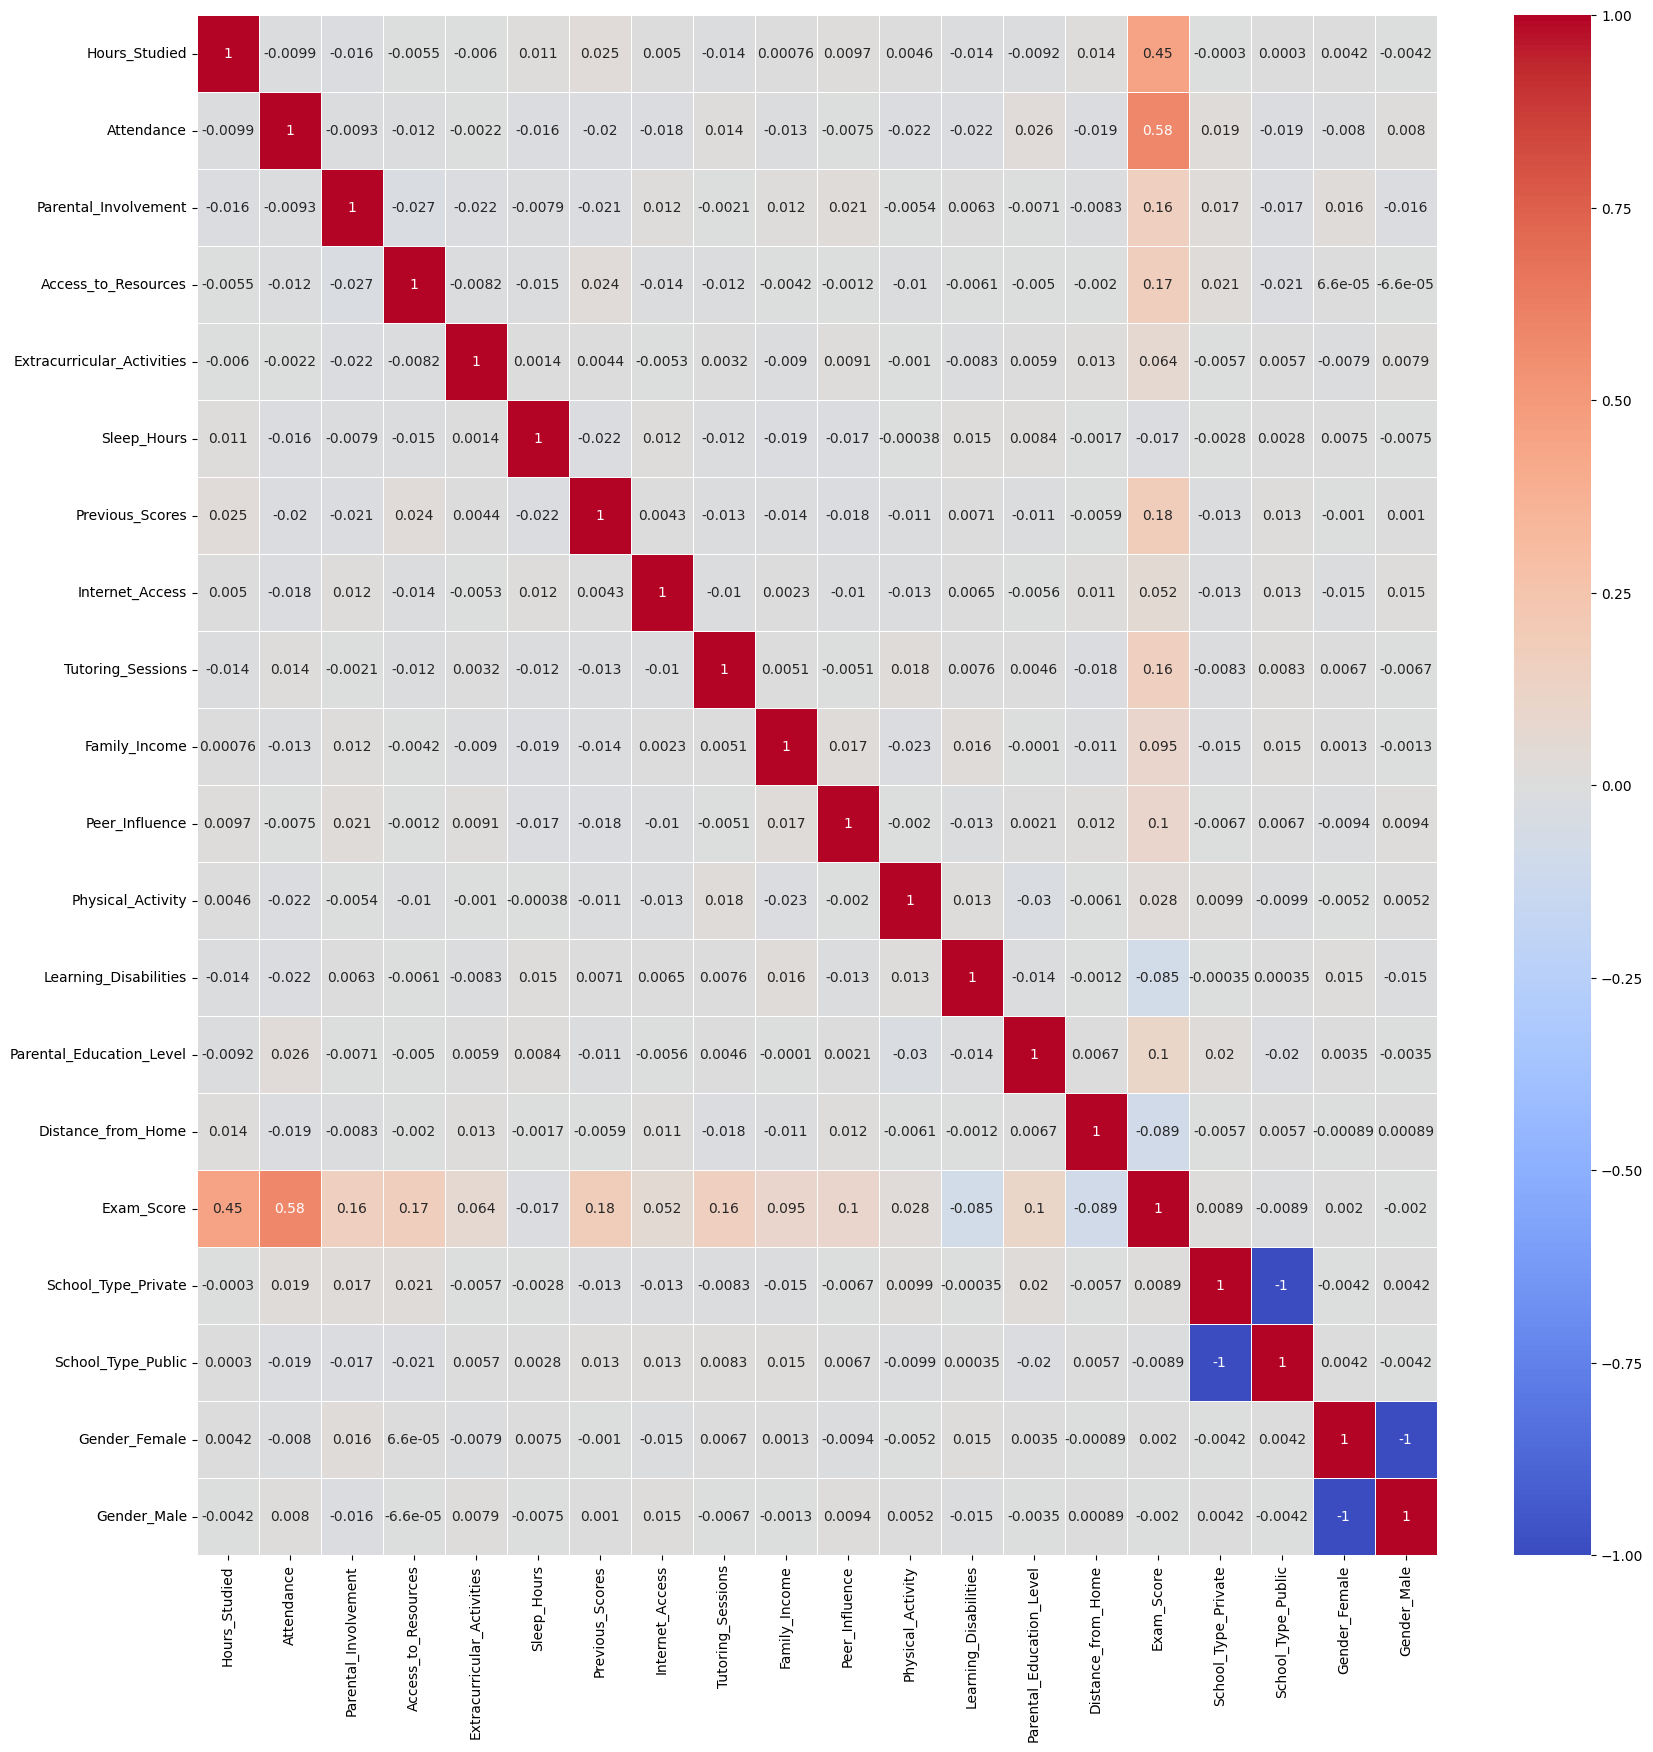

In [ ]:
correlacao1 = df_norm.corr()

plt.figure(figsize=(20, 20))

sns.heatmap(correlacao1, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

<p align='justify'>A última célula fazendo o download das nossas bases. Criamos uma coluna de index chamada "ID" para servir como um identificador de cada aluno.</p>

In [ ]:
df_norm.to_csv('Performance_Norm.csv', index_label='ID')
df_standard.to_csv('Performance_Standard.csv', index_label='ID')

#Objetivo 1: Treinar o modelo para previsão das notas.

Como nosso objetivo principal era treinar um modelo capaz de prever as notas dos alunos com base nos dados, realizamos testes utilizando a função LinearRegression() em duas versões do DataFrame: uma com os dados normalizados e outra com os dados padronizados.

Para o DataFrame Normalizado:

In [ ]:
X = df_norm.drop("Exam_Score", axis=1) # Separando X (variáveis de entrada)
y = df_norm["Exam_Score"] # Separando y (variável de saída)

In [ ]:
# Dividindo o conjunto de dados em treino e teste (2/3 treino, 1/3 teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)

In [ ]:
print(y_train)

5474    0.288889
5878    0.333333
5591    0.288889
3712    0.355556
2410    0.222222
          ...   
709     0.311111
5680    0.355556
3832    0.311111
151     0.333333
3964    0.244444
Name: Exam_Score, Length: 4404, dtype: float64


In [ ]:
# Treinando o modelo de Regressão Linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Calculando as previsões
y_pred = modelo.predict(X_test)

# Avaliando o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro Quadrático Médio: {mse:.4f}")
print(f"Coeficiente de Determinação: {r2:.4f}")

Erro Quadrático Médio: 0.0018
Coeficiente de Determinação: 0.7550


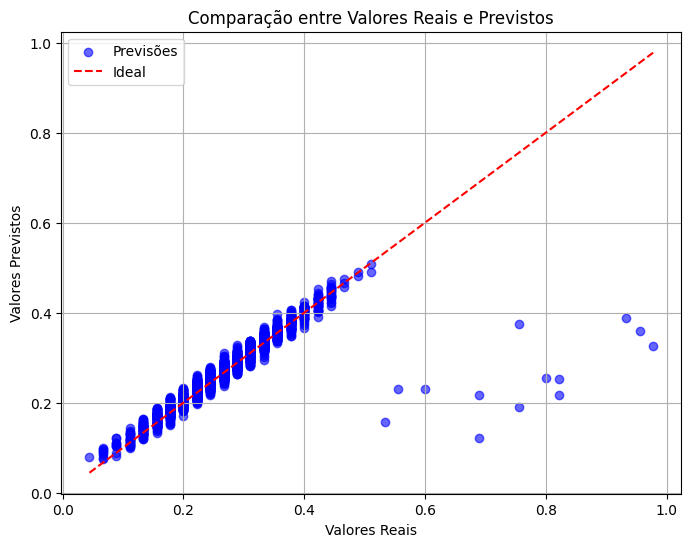

In [ ]:
plt.figure(figsize=(8, 6))

# Plotar os valores reais contra os previstos
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label="Previsões")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Ideal")  # Linha de perfeição

# Configurações do gráfico
plt.title("Comparação entre Valores Reais e Previstos")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.legend()
plt.grid(True)

# Mostrar o gráfico
plt.show()

Analisando o desempenho, vemos que o erro quadrático médio resultou em torno de 0.0023, o que significa que o modelo está prevendo bem, indicando previsões bem próximas dos valores reais.

O coeficiente de determinação é uma medida que verifica a variabilidade dos dados. Nesse caso, o coeficiente ser igual a 0.6946 mostra que cerca de 69% da variação nos dados de saída é explicado pelo modelo, enquanto o resto não é.





In [ ]:
print(np.any(y_pred < 0) or np.any(y_pred > 100))

False


Ou seja, todas as notas previstas estão dentro do escopo esperado, o que é fundamental para garantir que as previsões sejam realistas e consistentes com o contexto dos dados.

In [ ]:
dif = abs(y_test - y_pred)
print(dif[dif >= 0.5])
print(dif[dif >= 0.5].count())

4779    0.605146
1107    0.565156
5966    0.545057
1109    0.568600
3141    0.566648
4192    0.595936
2292    0.544168
2425    0.650749
Name: Exam_Score, dtype: float64
8


Como observamos, apenas 10 notas tiveram um erro maior ou igual a 0.5. Considerando o tamanho total da base de dados (6607), consideramos que o erro é aceitável.

Para o DataFrame Padronizado:

In [ ]:
X = df_standard.drop("Exam_Score", axis=1) # Separando X (variável de entrada)
y = df_standard["Exam_Score"] # Separando y (variável de saída)

In [ ]:
# Dividindo o conjunto de dados em treino e teste (2/3 treino, 1/3 teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)

In [ ]:
# Treinando o modelo de Regressão Linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Calculando as previsões
y_pred = modelo.predict(X_test)

# Avaliando o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro Quadrático Médio: {mse:.4f}")
print(f"Coeficiente de Determinação: {r2:.4f}")

Erro Quadrático Médio: 0.3207
Coeficiente de Determinação: 0.6883


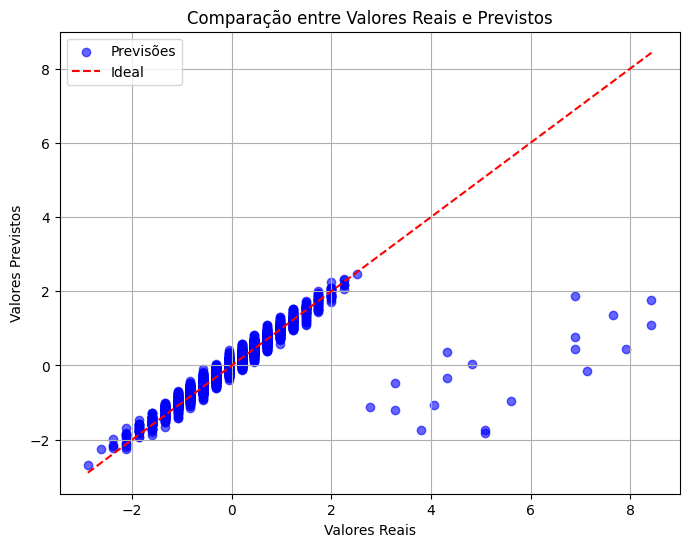

In [ ]:
plt.figure(figsize=(8, 6))

# Plotar os valores reais contra os previstos
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label="Previsões")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Ideal")  # Linha de perfeição

# Configurações do gráfico
plt.title("Comparação entre Valores Reais e Previstos")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.legend()
plt.grid(True)

# Mostrar o gráfico
plt.show()

Analisando o desempenho, vemos que o erro quadrático médio é maior (em torno de 0.2713), o que indica previsões menos precisas em comparação ao dataframe normalizado.

Entretanto, coeficiente de determinação aumentou para cerca de 0.7352, sugerindo que, embora o modelo tenha cometido erros maiores, ele conseguiu explicar uma maior proporção da variação nos dados de saída (73%).

In [ ]:
print(np.any(y_pred < 0) or np.any(y_pred > 100))

True


Nesse caso, temos previsões de notas que escapam do escopo possível, evidenciando irregularidades.

In [ ]:
dif = abs(y_test - y_pred)
print(dif[dif >= 0.5])
print(dif[dif >= 0.5].count())

4779    7.040880
5989    4.094446
4583    6.556045
2595    6.837237
1351    5.562714
4666    5.059423
2904    6.719506
770     5.845749
2542    3.937732
2421    4.771871
6347    5.988441
2425    7.524059
4875    0.530288
560     5.097181
5125    4.346881
Name: Exam_Score, dtype: float64
15


Além de haver um maior número de notas com erro maior ou igual a 0,5, os erros também são significativamente maiores quando comparados aos erros obtidos com o dataframe normalizado.

#Objetivo 2: Examinar a relação entre hábitos de estudo (horas dedicadas, frequência às aulas e monitorias) e a performance acadêmica.

<p align='justify'>A ideia principal dessa primeira análise é verificar a seguinte hipótese: alunos com maiores hábitos de estudo tem um desempenho significativamente maior do que os alunos que não tem. Vamos usar a regressão linear nesse caso, onde vamos dar as variáveis de estudos como as features de entrada e as notas do exame final para previsão.</p>

In [ ]:
f = df_encoded[['Hours_Studied', 'Attendance', 'Tutoring_Sessions']]
t = df_encoded[['Exam_Score']]

f_train, f_test, t_train, t_test = train_test_split(f, t, test_size=0.2)

In [ ]:
# Treinando o modelo de Regressão Linear
modelo_linear = LinearRegression()
modelo_linear.fit(f_train, t_train)

# Calculando as previsões no conjunto de teste
t_pred = modelo_linear.predict(f_test)

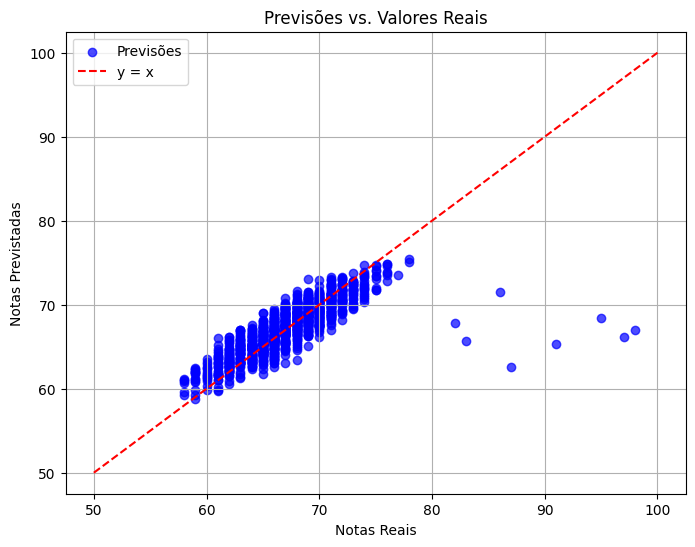

In [ ]:
# Suponha que y seja a saída real e y_pred as previsões do modelo
plt.figure(figsize=(8, 6))
plt.scatter(t_test, t_pred, alpha=0.7, color='b', label="Previsões")

# Adicionando a linha y = x
min_val = 50
max_val = 100
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='y = x')

plt.xlabel("Notas Reais")
plt.ylabel("Notas Previstadas")
plt.title("Previsões vs. Valores Reais")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Avaliando o desempenho do modelo
mse = mean_squared_error(t_test, t_pred)
r2 = r2_score(t_test, t_pred)

print(f"Erro Quadrático Médio: {mse:.4f}")
print(f"Coeficiente de Determinação: {r2:.4f}")

Erro Quadrático Médio: 6.0188
Coeficiente de Determinação: 0.6037


#Objetivo 3: Classificação dos estudantes: Classificar estudantes de alto, médio e baixo rendimento


<p align='justify'>Neste primeiro passo, utilizamos aprendizado supervisionado para classificar as instâncias. As instâncias serão separadas em três grupos:</p>
<ol>
<li>A: grupo de alto desempenho acadêmico</li>
<li>B: grupo de médio desempenho acadêmico</li>
<li>C: grupo de baixo desempenho acadêmico</li></ol>

In [ ]:
df_Means = df_encoded.copy()

In [ ]:
df_Means["Mean_Scores"] = df_Means[["Previous_Scores", "Exam_Score"]].mean(axis=1)
df_Means = df_Means.drop(["Previous_Scores", "Exam_Score"], axis=1)

In [ ]:
def assign_group(mean):
    if mean >= 80:
        return 'A'
    elif mean >= 60:
        return 'B'
    else:
        return 'C'

df_Means['Group'] = df_Means['Mean_Scores'].apply(assign_group)

In [ ]:
df_X = df_Means.drop(["Mean_Scores", "Group"], axis=1)
df_y = df_Means["Group"]

In [ ]:
X_training, X_test, y_training, y_test = train_test_split(df_X, df_y, test_size=0.25, stratify=df_y)

modelo_forest = RandomForestClassifier()
modelo_forest.fit(X_training, y_training)

y_pred = modelo_forest.predict(X_test)

In [ ]:
acuracia = accuracy_score(y_test, y_pred)

print(f"Acurácia do modelo: {acuracia:.2f}")

Acurácia do modelo: 0.76


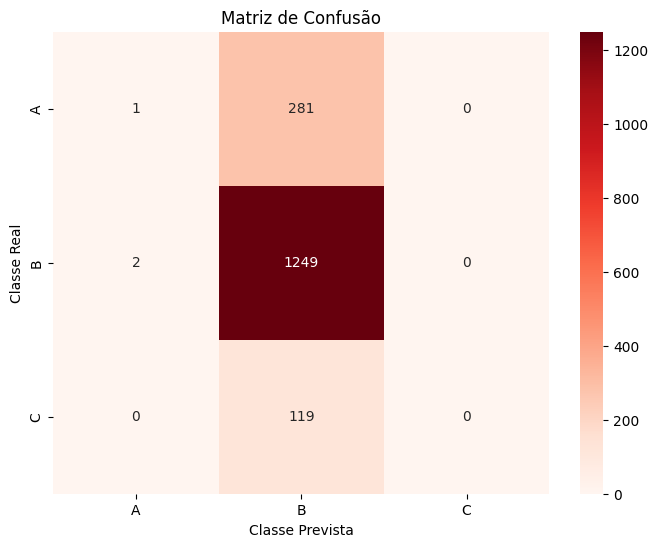

In [ ]:
# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=modelo_forest.classes_, yticklabels=modelo_forest.classes_)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
recall_classes = recall_score(y_test, y_pred, average=None)

print("Recall de cada classe:", recall_classes)

Recall de cada classe: [0.0035461  0.99840128 0.        ]


In [ ]:
# Definindo o modelo
modelo_forest = RandomForestClassifier()

# Definindo o StratifiedKFold para validação cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True)

# Inicializando listas para armazenar os valores reais e previstos
y_real = []
y_pred = []

# Realizando a validação cruzada
for train_index, test_index in cv.split(df_X, df_y):
    X_train, X_test = df_X.iloc[train_index], df_X.iloc[test_index]
    y_train, y_test = df_y.iloc[train_index], df_y.iloc[test_index]

    # Treinando o modelo
    modelo_forest.fit(X_train, y_train)

    # Fazendo previsões
    y_pred_fold = modelo_forest.predict(X_test)

    # Adicionando os valores reais e previstos nas listas
    y_real.extend(y_test)
    y_pred.extend(y_pred_fold)

# Convertendo para arrays numpy para facilitar a análise
y_real = np.array(y_real)
y_pred = np.array(y_pred)

# Exibindo as previsões e os valores reais
print("Valores Reais:", y_real)
print("Valores Previstos:", y_pred)

# Calculando a acurácia geral
acuracia = accuracy_score(y_real, y_pred)
print(f"Acurácia geral: {acuracia:.2f}")

Valores Reais: ['B' 'B' 'B' ... 'B' 'B' 'B']
Valores Previstos: ['B' 'B' 'B' ... 'B' 'B' 'B']
Acurácia geral: 0.76


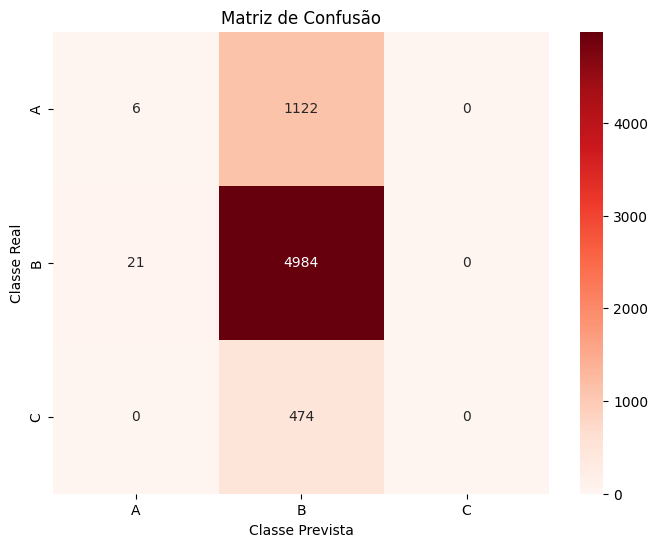

In [ ]:
# Calculando a matriz de confusão
cm = confusion_matrix(y_real, y_pred)

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=modelo_forest.classes_, yticklabels=modelo_forest.classes_)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
# Selecionando uma árvore específica (por exemplo, a primeira árvore)
arvore = modelo_forest.estimators_[0]

# Exportando a árvore como um gráfico DOT
dot_data = export_graphviz(
    arvore,
    out_file=None,
    feature_names=df_X.columns,  # Nomes das features
    class_names=[str(cls) for cls in modelo_forest.classes_],  # Nomes das classes
    filled=True,  # Cores nos nós
    rounded=True,  # Cantos arredondados
    special_characters=True
)

# Gerando e exibindo a árvore com graphviz
graph = graphviz.Source(dot_data)
graph.render("Arvore_Decisao", format="png", cleanup=True)  # Salva em arquivo PNG
graph.view()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.347252 to fit


'Arvore_Decisao.pdf'